In [1]:
import basedosdados as bd
import pandas as pd
import matplotlib as plt
from statistics import mean

# Queries

# Índice de Desenvolvimento da Educação Básica por município
ideb_municipio = '''
SELECT id_municipio, avg(ideb) as ideb_municipio
FROM `basedosdados.br_inep_ideb.municipio`
WHERE ano = 2007
GROUP BY id_municipio
'''

# Indicadores de desigualdade econômica por municipio
indicadores_adh = '''
SELECT id_municipio, avg(prop_pobreza) as prop_pobreza,
        avg(idhm_r) as idhm_r
FROM `basedosdados.mundo_onu_adh.municipio`
WHERE ano = 2010
GROUP BY id_municipio
'''


In [2]:
idebMunicipioDf = bd.read_sql(ideb_municipio, billing_project_id="ps-analytica-a2-416401")
idebMunicipioDf

Downloading: 100%|█████████████████████| 5569/5569 [00:00<00:00, 11542.65rows/s]


,id_municipio,ideb_municipio
0,1200393,2.600000
1,1200435,2.675000
2,2700607,2.760000
3,2700706,2.460000
4,2701001,2.666667
...,...,...
5564,3505302,5.200000
5565,3514924,4.700000
5566,3526308,4.950000
5567,3527900,4.700000


In [3]:
indicadoresADHDf = bd.read_sql(indicadores_adh, billing_project_id="ps-analytica-a2-416401")
indicadoresADHDf

Downloading: 100%|██████████████████████| 5565/5565 [00:00<00:00, 9210.34rows/s]


,id_municipio,prop_pobreza,idhm_r
0,1100015,26.04,0.657
1,1100023,11.54,0.716
2,1100031,21.20,0.650
3,1100049,13.08,0.727
4,1100056,13.70,0.688
...,...,...,...
5560,5222005,5.85,0.710
5561,5222054,6.62,0.707
5562,5222203,23.61,0.619
5563,5222302,19.77,0.629


In [4]:
# Relacionando o ideb aos indicadores do ADH (renda e proporção de pobreza) para cada município
ideb_adh = idebMunicipioDf.merge(indicadoresADHDf, left_on='id_municipio', right_on='id_municipio', how='inner')

ranges = {'3-4': [], '4-5': [], '5-6': []}

for indice, municipio in ideb_adh.iterrows():
    if municipio['ideb_municipio'] < 3:
        continue
    if municipio['ideb_municipio'] < 4:
        ranges['3-4'].append(municipio['prop_pobreza'])
    elif municipio['ideb_municipio'] < 5:
        ranges['4-5'].append(municipio['prop_pobreza'])
    elif municipio['ideb_municipio'] <= 6:
        ranges['5-6'].append(municipio['prop_pobreza'])

propMunicipios3_6 = (len(ranges['3-4']) + len(ranges['4-5']) + len(ranges['5-6'])) / len(ideb_adh)
print('Estas faixas contemplam %.2f%% dos municípios' % (propMunicipios3_6 * 100))
print(len(ranges['3-4']), len(ranges['4-5']), len(ranges['5-6']))
ideb_adh

Estas faixas contemplam 81.73% dos municípios
2185 2092 271


,id_municipio,ideb_municipio,prop_pobreza,idhm_r
0,1200393,2.600000,53.25,0.521
1,1200435,2.675000,73.40,0.519
2,2700607,2.760000,23.89,0.638
3,2700706,2.460000,39.85,0.563
4,2701001,2.666667,42.95,0.560
...,...,...,...,...
5560,3505302,5.200000,1.54,0.762
5561,3514924,4.700000,1.40,0.711
5562,3526308,4.950000,9.07,0.686
5563,3527900,4.700000,8.28,0.670


<Axes: xlabel='Faixa do ideb', ylabel='Proporção de pobres'>

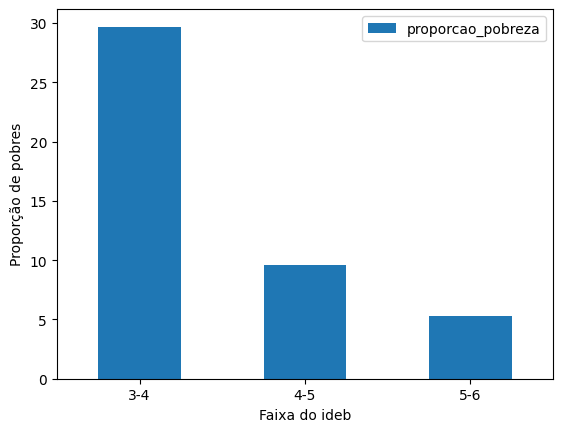

In [5]:
propPobreza_faixaIdebDf = pd.DataFrame({'faixa': ranges.keys(), 'proporcao_pobreza': map(mean, ranges.values())})
propPobreza_faixaIdebDf.plot.bar(xlabel='Faixa do ideb', ylabel='Proporção de pobres', x='faixa', rot=0)

<Axes: xlabel='IDH Municipal - Renda', ylabel='Ideb do Município'>

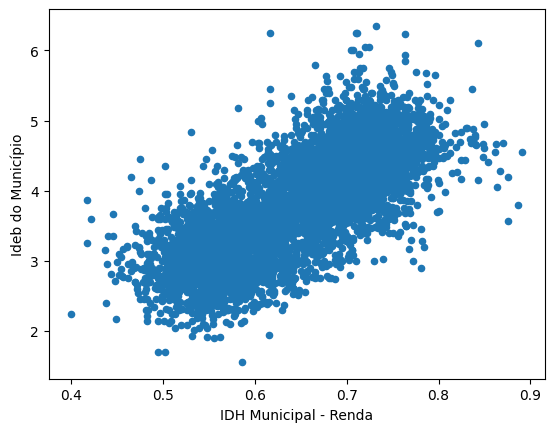

In [6]:
ideb_adh.plot.scatter(xlabel='IDH Municipal - Renda', ylabel='Ideb do Município', x='idhm_r', y='ideb_municipio')